## Importing library

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data loading



Load the diabetes.csv dataset that i've uploaded to github. transform it into a pandas DataFrame and display the first 5 rows to make sure.



In [5]:
github_url = "https://raw.githubusercontent.com/rakhapta/diabetes-prediction/refs/heads/main/diabetes.csv"
df = pd.read_csv(github_url)
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

Explore the dataset to understand its structure, including the shape of the data, the distribution of the data, and the correlation between variables. This includes displaying basic information and descriptive statistics, visualizing distributions using histograms, creating a heatmap to visualize feature correlations, and visualizing the target variable distribution.


### Display the shape of the DataFrame

In [6]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (768, 9)


### Display basic information about the DataFrame

In [7]:
print("\nInfo:")
display(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

### Generate descriptive statistics

In [8]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Create histograms for each numerical feature


Histograms:


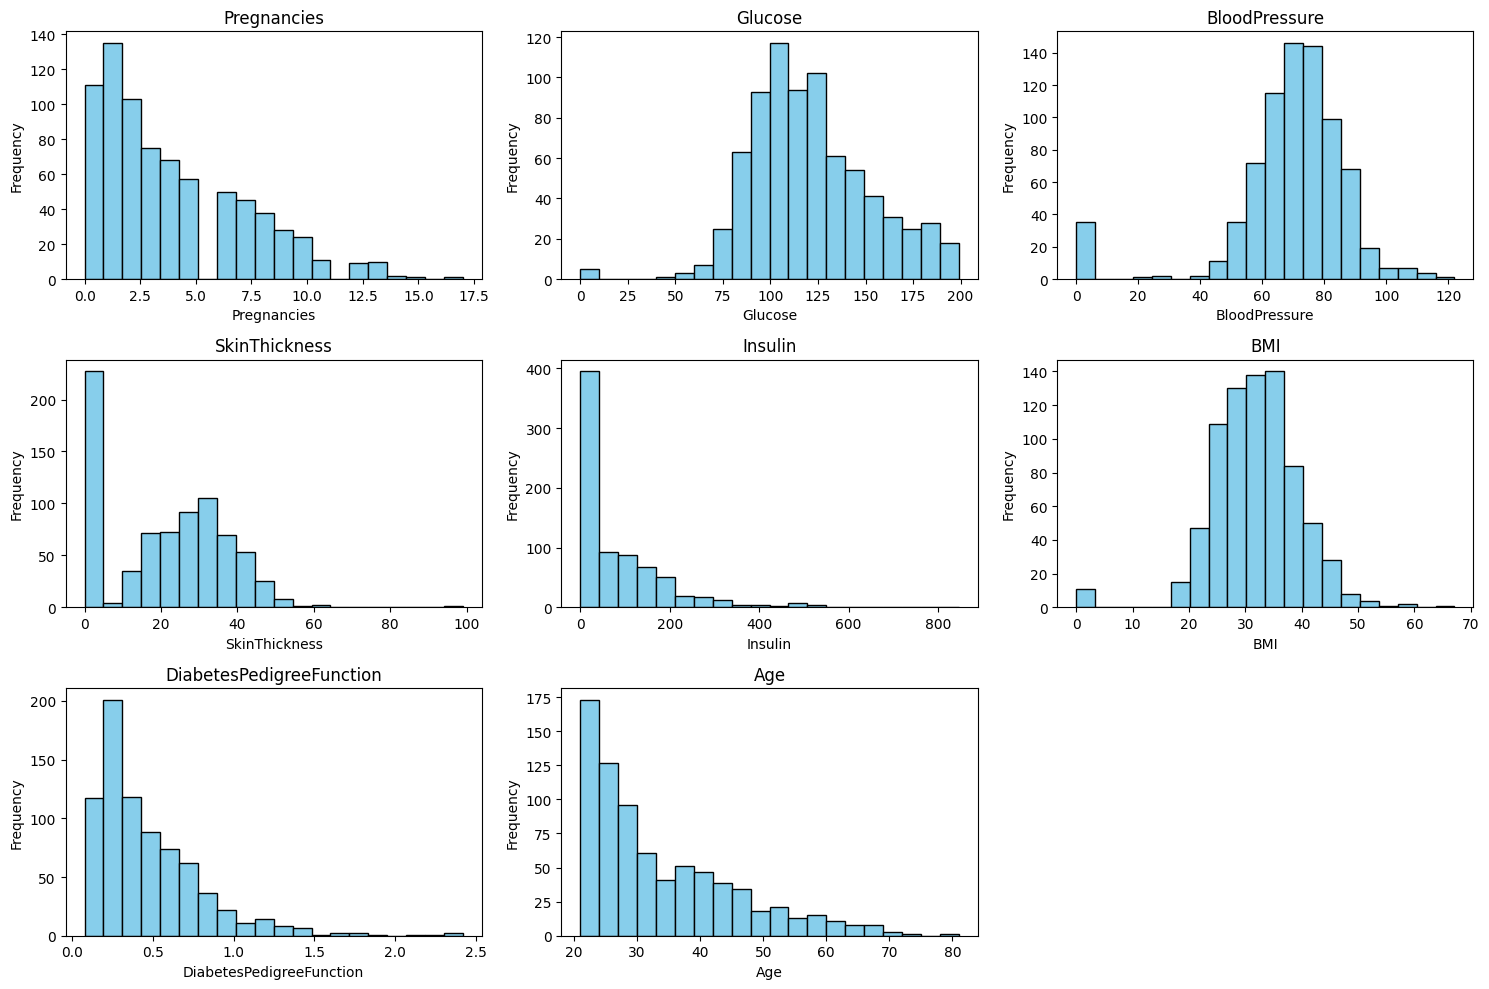

In [9]:
print("\nHistograms:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

We can see that most of the features (such as Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, and Age) have skewed distribution

### Create a heatmap to visualize the correlation matrix


Correlation Heatmap:


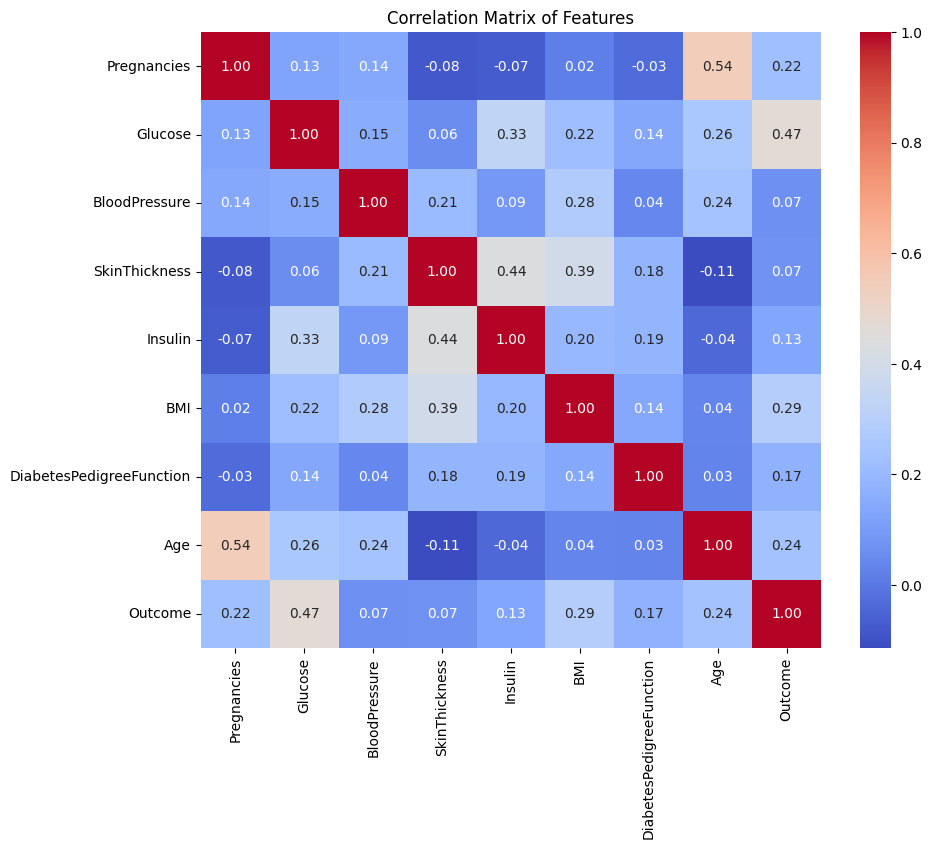

In [10]:
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

We can see that 'Glucose', 'BMI', dan 'Age' having a strong positive correlation with variabel target 'Outcome'.

### Visualize the distribution of the target variable


Target Variable Distribution:


<ipython-input-11-adcd9b891c8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette=['lightcoral', 'lightgreen'])


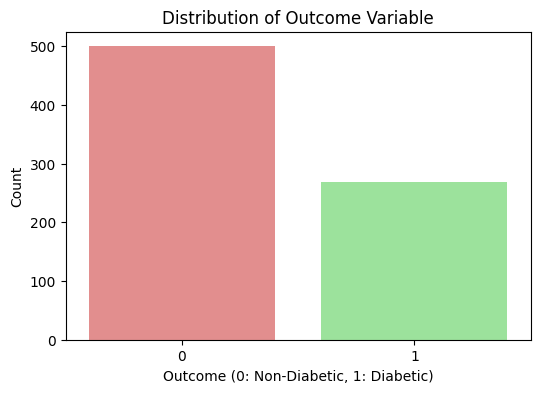

In [11]:
print("\nTarget Variable Distribution:")
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette=['lightcoral', 'lightgreen'])
plt.title("Distribution of Outcome Variable")
plt.xlabel("Outcome (0: Non-Diabetic, 1: Diabetic)")
plt.ylabel("Count")
plt.show()

# Data Preparation

## Data cleaning


Handle illogical zero values in 'Glucose', 'BloodPressure', 'BMI',  'SkinThickness',	and 'Insulin' columns. Replacing it with their respective medians and verify the changes


In [12]:
for col in ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness',	'Insulin']:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

### Display descriptive statistics to verify changes

In [13]:
print("\nDescriptive Statistics after handling zero values:")
display(df.describe())


Descriptive Statistics after handling zero values:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data splitting

Split the data into training and testing sets with an 80:20 ratio, stratifying by the 'Outcome' column, and using a random state for reproducibility.


Define features (x) and target variable (y)

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Split data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Print the shapes of the resulting sets

In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


## Feature scaling/standarization

Standardize the features using StandardScaler. Then, fit on training data and transform both training and test data


In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (614, 8)
X_test_scaled shape: (154, 8)


### Feature Scaling using StandardScaler

Feature scaling is crucial for algorithms like K-Nearest Neighbors (KNN) that rely on distance calculations between data points.  KNN determines the class of a new data point by considering its proximity to its *k* nearest neighbors in the feature space.  Features with larger scales can disproportionately influence these distance calculations. For example, if one feature has a range of 0-100 and another has a range of 0-1, the feature with the larger scale will dominate the distance metric, potentially overshadowing the impact of the other feature.

Standardization, performed by `StandardScaler`, transforms features to have zero mean and unit variance. This ensures that all features contribute equally to the distance computations.  By removing the effect of differing scales, the KNN algorithm can make more accurate predictions based on the true relationships between features rather than being biased by the magnitude of individual features.  The result is a more robust and effective KNN model.

# Model training





Train KNN and Random Forest models using the scaled training data and explain the advantages and disadvantages of each algorithm.



### Initialize and train the KNN model

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

print("KNN model trained successfully.")

KNN model trained successfully.


### Initialize and train the Random Forest model

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train_scaled, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


# Model evaluation

Evaluate the performance of the trained KNN and Random Forest models using confusion matrices and classification reports. Focus on the recall score for the positive class (diabetes) to determine the best model.



### Predict on the test set for both models, then Generate and plot confusion matrices

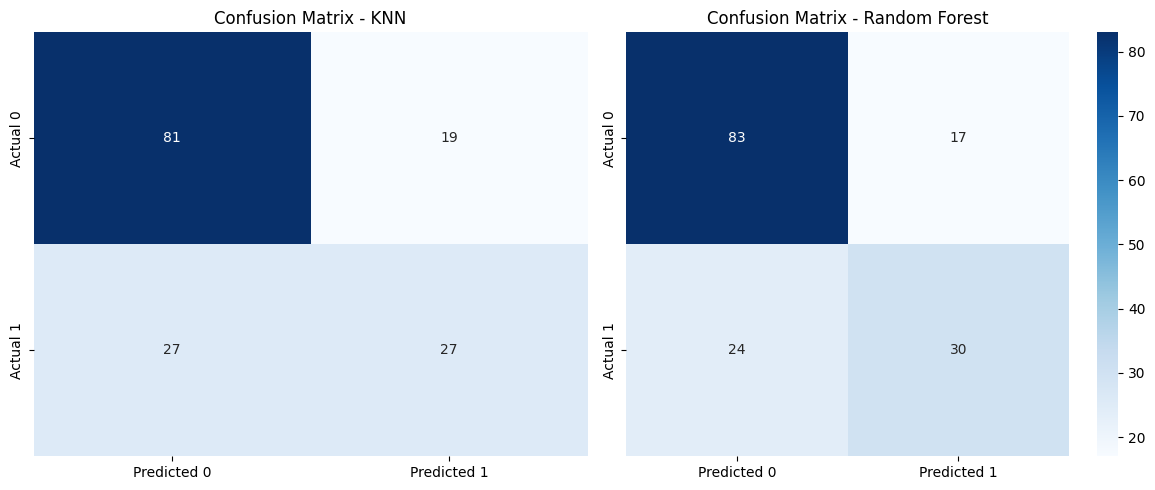

In [20]:
knn_predictions = knn_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
knn_cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - KNN")

plt.subplot(1, 2, 2)
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Random Forest")

plt.tight_layout()
plt.show()

### Generate classification reports

In [21]:
print("Classification Report - KNN:\n", classification_report(y_test, knn_predictions))
print("Classification Report - Random Forest:\n", classification_report(y_test, rf_predictions))

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



Analysis:  
Compare the recall scores for the positive class (diabetes) in both models. A higher recall indicates better ability of the model to correctly identify diabetic cases.  In a medical context, misclassifying a diabetic patient as non-diabetic (false negative) can have severe consequences; thus, a higher recall is often prioritized. The model with the higher recall is preferred.

## Summary:

### Q&A
* **Which model performed better in predicting diabetes risk, and why?**  The Random Forest model performed slightly better than the K-Nearest Neighbors (KNN) model, primarily due to its higher recall score for the positive class (diabetes).  A higher recall indicates a better ability to correctly identify all actual diabetic cases.  In a medical context, misclassifying a diabetic patient as non-diabetic (false negative) can have serious health consequences, thus prioritizing recall.

### Data Analysis Key Findings
* **Data Cleaning:** Illogical zero values in 'Glucose', 'BloodPressure', 'BMI',  'SkinThickness',	and 'Insulin' columns were replaced with their respective medians.
* **Data Splitting:** The dataset was split into 80% training and 20% testing data, using stratification to maintain class distribution.
* **Feature Scaling:**  Features were standardized using `StandardScaler` to ensure equal contribution to distance calculations, especially crucial for the KNN model.
* **Model Comparison (Recall):** The Random Forest model achieved a recall of 0.56 for the positive class (diabetes) compared to KNN's recall of 0.50.  Given the importance of minimizing false negatives in a medical context, the Random Forest model's higher recall makes it the preferred model.

### Insights or Next Steps
* **Hyperparameter Tuning:** Explore hyperparameter tuning for both models to potentially improve their performance, especially focusing on parameters that could increase recall for the positive class.
* **Feature Engineering:** Consider creating new features or transforming existing ones to potentially improve model accuracy.  Investigate the interaction between the features.


# Tuning
## Tuning the parameter to increase the recall score
Tuning both model using manual hyperparameter tuning, starting from random forest first

In [22]:
rf_model_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')
rf_model_tuned.fit(X_train_scaled, y_train)

knn_model_tuned = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model_tuned.fit(X_train_scaled, y_train)

print("Tuned KNN and Random Forest models trained successfully.")

Tuned KNN and Random Forest models trained successfully.


### Predict on the test set for both tuned models, then Generate and plot confusion matrices

Predict on both tuned models

In [23]:
knn_predictions_tuned = knn_model_tuned.predict(X_test_scaled)
rf_predictions_tuned = rf_model_tuned.predict(X_test_scaled)

Plot confusion matrices

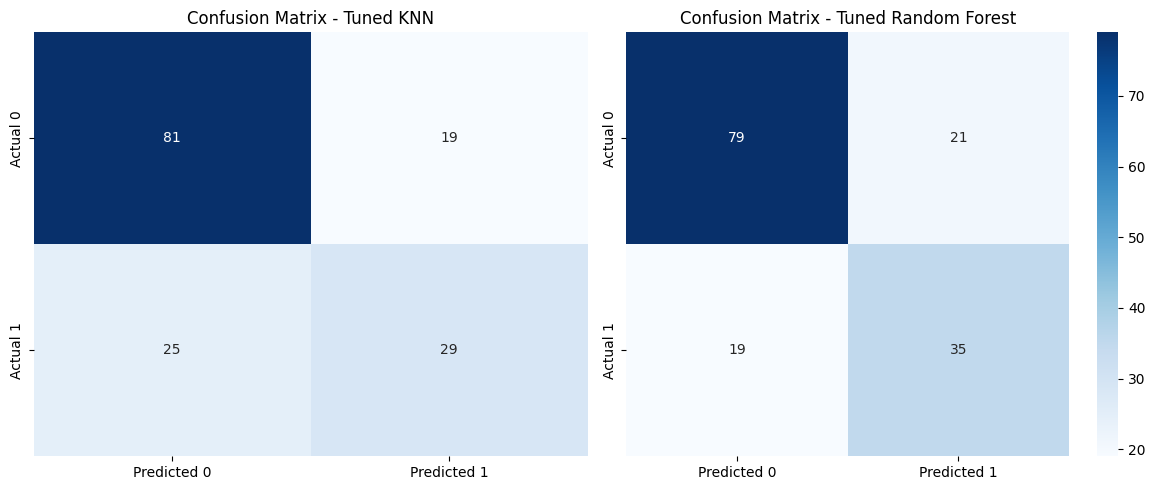

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
knn_cm_tuned = confusion_matrix(y_test, knn_predictions_tuned)
sns.heatmap(knn_cm_tuned, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Tuned KNN")

plt.subplot(1, 2, 2)
rf_cm_tuned = confusion_matrix(y_test, rf_predictions_tuned)
sns.heatmap(rf_cm_tuned, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Tuned Random Forest")

plt.tight_layout()
plt.show()

### Generate classification reports for tuned models

In [25]:
print("Classification Report - Tuned KNN:\n", classification_report(y_test, knn_predictions_tuned))
print("Classification Report - Tuned Random Forest:\n", classification_report(y_test, rf_predictions_tuned))

Classification Report - Tuned KNN:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       100
           1       0.60      0.54      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154

Classification Report - Tuned Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.62      0.65      0.64        54

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



Analysis:  
Compare the recall scores for the positive class (diabetes) in both models. A higher recall indicates better ability of the model to correctly identify diabetic cases.  In a medical context, misclassifying a diabetic patient as non-diabetic (false negative) can have severe consequences; thus, a higher recall is often prioritized. The model with the higher recall is preferred.

### Overall Findings after tuning:
*   **Impact of Tuning**: Tuning had a positive impact on both KNN and Random Forest models, improving their recall for the positive class.
*   **Model Comparison (Recall)**: The Tuned Random Forest model demonstrates superior performance in identifying the positive class (diabetes) with a recall of 0.65, significantly higher than the Tuned KNN's recall of 0.54.
*   **Recommendation**: Given the importance of minimizing false negatives in a medical context (misclassifying a diabetic patient as non-diabetic), the Tuned Random Forest model is the preferred model due to its higher recall for the positive class. It is better at correctly identifying diabetic patients.





